2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
y = Salaary Hike
x = year experience

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.columns[0]

'YearsExperience'

In [8]:
data.shape

(30, 2)

In [9]:
#data types
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [10]:
data.iloc[0,:]

YearsExperience        1.1
Salary             39343.0
Name: 0, dtype: float64

In [11]:
data['YearsExperience']=pd.to_numeric(data['YearsExperience'],errors='coerce')
data['Salary']=pd.to_numeric(data['Salary'],errors='coerce')

In [12]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [91]:
#Print the duplicated rows
#data[data.duplicated()]

<AxesSubplot:>

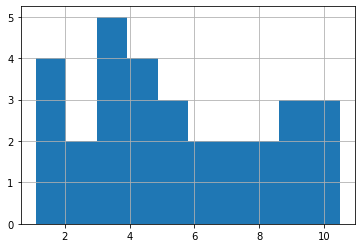

In [14]:
# histogram of 
data['YearsExperience'].hist()

<AxesSubplot:>

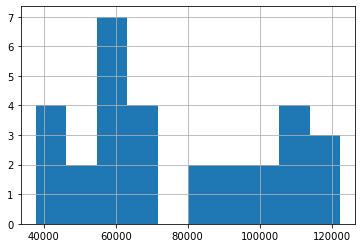

In [15]:
# histogram of 
data['Salary'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d39ff02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d39ff0970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d3a05df10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d39ffc070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d39ffc3d0>],
 'means': []}

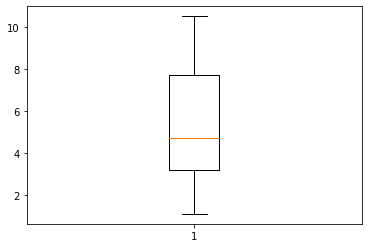

In [16]:
#Box plot

plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d39fca2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d39fca9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d39fbbf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d39fd50a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d39fd5400>],
 'means': []}

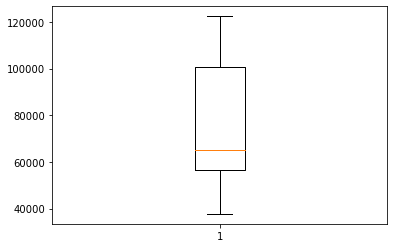

In [17]:
#Box plot

plt.boxplot(data['Salary'])

<AxesSubplot:>

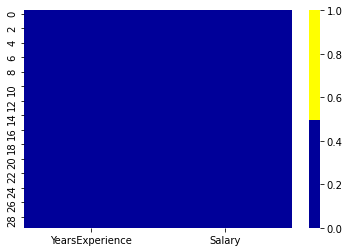

In [18]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours), vmin=0, vmax=1)

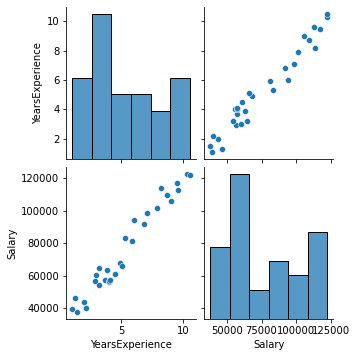

In [19]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [20]:
#Correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [21]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [105]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [22]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [25]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

In [23]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
import pandas_profiling as pp
import sweetviz as sv

In [27]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report_salary.html')

/home/sachin/anaconda3/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [28]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Report_2.html')


Report Report_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()   #AT = y, Waist= x

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

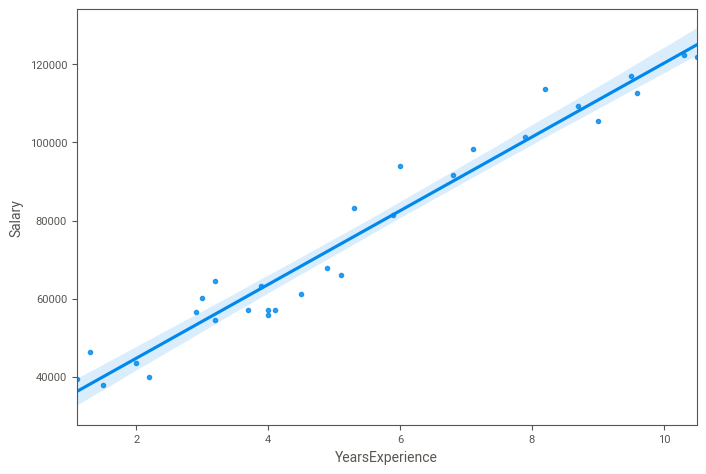

In [33]:
#ST, DT= pd.Series(data.ST, name="Sorting Time"), pd.Series(data.DT, name="Delivery Time")
sns.regplot(x="YearsExperience", y="Salary", data=data)

In [34]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    #pvlaues< 5% to accept the model

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [36]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.9569566641435086, 0.9554194021486339)

In [37]:
#Predict for salaray for
newdata=pd.Series([3.5, 4.5, 6.5])

In [38]:
newdata

0    3.5
1    4.5
2    6.5
dtype: float64

In [39]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [40]:
data_pred

,YearsExperience
0,3.5
1,4.5
2,6.5


In [41]:
model.predict(data_pred)

0    58867.068324
1    68317.030645
2    87216.955288
dtype: float64